# **Movie Recommendation System Part 1**

---------------
## **Context**
---------------

Online streaming platforms like **Netflix** have plenty of movies in their repository and if we can build a **Recommendation System** to recommend **relevant movies** to users, based on their **historical interactions**, this would **improve customer satisfaction** and hence, it will also improve the revenue of the platform. The techniques that we will learn here will not only be limited to movies, it can be any item for which you want to build a recommendation system.

-----------------
## **Objective**
-----------------

In this case study, we will build various recommendation systems:
- Knowledge/Rank based recommendation system
- Similarity-Based Collaborative filtering
- Matrix Factorization Based Collaborative Filtering

To demonstrate the above techniques, we are going to use the **ratings** dataset.

-----------------
## **Dataset**
-----------------

The **ratings** dataset contains the following attributes:
- userId
- movieId
- rating
- timestamp

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this case study.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 142.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but yo

**Note**: After running the above cell, a pop-up will appear asking you to restart the session. Please click "Restart." Once the session restarts, continue running the notebook from the next cell.

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463321 sha256=46b76a22710c878ad04f07d02d9d03e287953d864b04dbf8e13ba1a2389f0c03
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

### **Loading the data**

In [ ]:
# Importing the "ratings.csv" dataset
rating = pd.read_csv('/content/drive/MyDrive/ratings.csv')

Let's check the **info** of the data.

In [ ]:
# Info of the dataframe
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- In the ratings data, there are **100,836 rows** and **4 columns**.
- All the columns are of **numeric data type**.
- The data type of the timestamp column is int64 which is incorrect. We can convert this to DateTime format, but **we don't need a timestamp column for our analysis**. Hence, **we can drop this column**.

In [ ]:
# drop() is a method used to remove the desired columns/rows from a dataframe
rating = rating.drop(['timestamp'], axis = 1)

**Now, let us see the top five records of the rating data.**

In [ ]:
# head() is a method used to display the first n records of a dataframe, by default n=5.
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## **Exploring the dataset**

Let's explore the dataset and answer some basic data-related questions:

#### **Q1. What is the total number of unique users?**

In [ ]:
# Finding number of unique users by using nunique method
rating['userId'].nunique()

610

- There are **610 unique users** in the "rating" dataset.

#### **Q2. What is the total number of unique movies?**

In [ ]:
# Finding the number of unique movies
rating['movieId'].nunique()

9724

- There are **9,724 unique movies** in the dataset.
- As per the number of unique users and movies, there is a **possibility of 610 * 9724 = 59,31,640 ratings** in the dataset. But **we only have 100,836 ratings**, i.e., not every user has rated every movie in the dataset, which is quite understandable. This creates the possibility of building a recommendation system to recommend movies to the users which they have not interacted with.

#### **Q3. Is there any movie that has been interacted with more than once by the same user?**

In [ ]:
# Finding the frequency of movies rated by each user
rating.groupby(['userId', 'movieId']).count()

rating
userId movieId        
1      1             1
       3             1
       6             1
       47            1
       50            1
...                ...
610    166534        1
       168248        1
       168250        1
       168252        1
       170875        1

[100836 rows x 1 columns]

In [ ]:
# Finding the sum of ratings count by user-movie pair
rating.groupby(['userId', 'movieId']).count()['rating'].sum()

100836

- The **sum is equal to the total number of observations**, which implies that **there is only one interaction between a pair of a movie and a user**.

#### **Q4. Which one is the most interacted movie in the dataset?**

In [ ]:
# Counting the number of people who have watched a certain movie
rating['movieId'].value_counts()

,count
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


- The **movie with movieId 356 has been interacted by most users** which is **329** times.
- But still, there is a possibility of 610-329 = 281 more interactions as we have 610 unique users in our dataset. For those 281 remaining users, we can build a recommendation system to predict who is most likely to interact with this movie.

Also, out of these 329 interactions, we need to consider the distribution of ratings as well to check whether this movie is the most liked or most disliked movie.

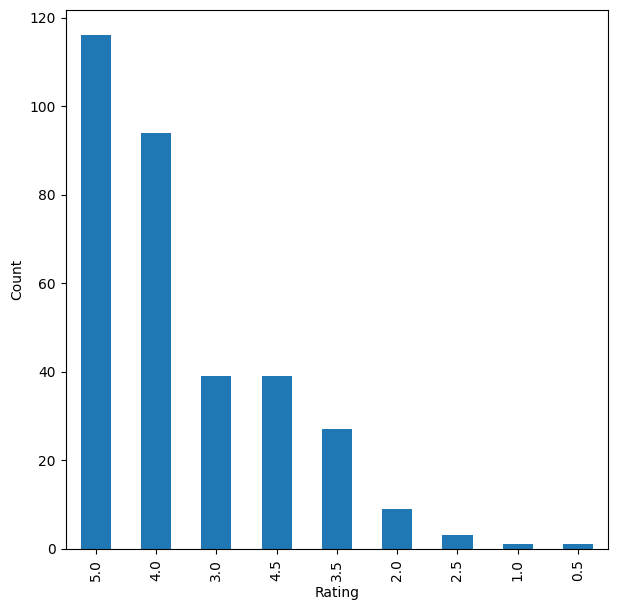

In [ ]:
# Plotting distributions of ratings for 329 interactions with movieid 356

# Let us fix the size of the figure
plt.figure(figsize = (7, 7))

rating[rating['movieId'] == 356]['rating'].value_counts().plot(kind = 'bar')

# This gives a label to the variable on the x-axis
plt.xlabel('Rating')

# This gives a label to the variable on the y-axis
plt.ylabel('Count')

# This displays the plot
plt.show()

- We can see that **this movie has been liked by the majority of users**, as the count of ratings 5 and 4 is higher than the count of lower ratings.
- There can be movies with very high interactions but the count of ratings 1 and 2 may be much higher than the count for ratings 4 or 5 which would imply that the movie is disliked by the majority of the users.

#### **Q5. Which user interacted the most with any movie in the dataset?**

In [ ]:
# Counting the number of movies each user has watched
rating['userId'].value_counts()

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


- The user with **userId: 414** has interacted with the most number of movies, i.e., **2,698** times.
- But still, there is a possibility of 9724 - 2698 = 7026 more interactions as we have 9724 unique movies in our dataset. For those **7026** remaining movies, we can build a recommendation system to predict which movies are most likely to be watched by this user.

#### **Q6. What is the distribution of the user-movie interactions in this dataset?**

In [ ]:
# Finding user-movie interactions distribution
count_interactions = rating.groupby('userId').count()['movieId']
count_interactions

,movieId
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


## **Model 1: Create Rank-Based Recommendation System**

Rank-based recommendation systems provide recommendations based on the **most popular items**. This kind of recommendation system is useful when we have **cold start** problem. Cold start refers to the issue when we get a new user into the system and the machine is **not** able to recommend movies to him, as the user did not have any historical interactions available in the dataset. In those cases, we can use a rank-based recommendation system to recommend movies to the new user.

To build the rank-based recommendation system, we take the **average** of all the ratings provided to each movie and then rank them based on their average rating.

In [ ]:
# Calculate average ratings for each movie
average_rating = rating.groupby('movieId').mean()['rating']

# Calculate the count of ratings for each movie
count_rating = rating.groupby('movieId').count()['rating']

# Making a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

In [ ]:
# First 5 records of the final_rating dataset
final_rating.head()

,avg_rating,rating_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


Now, let's create a function to find the **top n movies** for a recommendation based on the average ratings of movies. We can also add a **threshold for a minimum number of interactions** for a movie to be considered for recommendation.

In [ ]:
# It gives top n movies among those being watched for more than min_interactions
def top_n_movies(data, n, min_interaction = 100):

    # Finding movies with interactions greater than the minimum number of interactions
    recommendations = data[data['rating_count'] > min_interaction]

    # Sorting values with respect to the average rating
    recommendations = recommendations.sort_values(by = 'avg_rating', ascending = False)

    return recommendations.index[:n]

We can **use this function with different n's and minimum interactions** to get movies to be recommended.

### **Recommending top 5 movies with 50 minimum interactions based on popularity**

In [ ]:
list(top_n_movies(final_rating, 5, 50))

[318, 858, 2959, 1276, 750]

### **Recommending top 5 movies with 100 minimum interactions based on popularity**

In [ ]:
list(top_n_movies(final_rating, 5, 100))

[318, 858, 2959, 1221, 48516]

### **Recommending top 5 movies with 200 minimum interactions based on popularity**

In [ ]:
list(top_n_movies(final_rating, 5, 200))

[318, 2959, 50, 260, 527]

Now that we have seen **how to apply the Rank-Based Recommendation System**, let's apply the **Collaborative Filtering Based Recommendation Systems**.

## **Model 2: Collaborative Filtering Based Recommendation System**

![collaborative_filtering.PNG](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/collaborative_filtering.PNG)

In the above **interactions matrix**, out of users B and C, which user is most likely to interact with the movie, "The Terminal"?

In this type of recommendation system, `we do not need any information` about the user or item. We only need user-item interaction data to build a collaborative recommendation system. For example:
<ol>
    <li><b>Ratings</b> provided by users. For example, ratings of books on goodread, movie ratings on imdb, etc.</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos, etc.</li>
    <li><b>Use/buying</b> of a product by users. For example, buying different items on e-commerce sites.</li>
    <li><b>Reading</b> of articles by readers on various blogs.</li>
</ol>

### **Types of Collaborative Filtering**

- Similarity/Neighborhood-based
 * User-User similarity-based  
 * Item-Item similarity-based
- Model-based

### **Building user-user similarity/neighborhood based Collaborative Filtering.**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/cosine.PNG)

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building a **similarity-based recommendation system** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library - `surprise` to build the remaining models, let's first import the necessary classes and functions from this library.
- Please use the following code to `install the surprise` library. You only do it **once** while running the code for the first time.

**!pip install surprise**

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating (here 3.5)** is relevant, and an item that is **actually rated lower than the threshold rating is a non-relevant item**.  

**Recommended item:** An item whose **predicted rating is higher than the threshold (here 3.5) is a recommended item**, and an item whose **predicted rating is lower the threshold rating is a non-recommended item**, i.e., it will not be recommended to the user.  

**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user, then recall is 0.60. Higher the value of recall, better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user, then precision is 0.60. The higher the value of precision, better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important**, it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 is taken for the recommended and relevant ratings**.
- In the **present case, precision and recall, both need to be optimized as the service provider would like to minimize both the losses discussed** above. Hence, the correct performance measure is the **F_1 score**.

Below we are converting the **`rating` dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`**. This is required by the surprise library. To do this, we will be **using the classes `Reader` and `Dataset`**.

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

- Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.
- **KNNBasic** is an algorithm that is also **associated with the surprise package**. It is used to find the **desired similar items among a given set of items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user)

RMSE: 0.9823
Precision:  0.757
Recall:  0.542
F_1 score:  0.632


- We have calculated **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**.
- Intuition of Recall: We are getting a **recall of ~0.54**, which means out of **all the relevant movies 54% are recommended**.
- Intuition of Precision: We are getting a **precision of ~ 0.76**, which means **out of all the recommended movies 76% are relevant**.
- Here **F_1 score** of the **baseline model is ~0.63**. It indicates that **mostly recommended movies were relevant and relevant movies were recommended**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

Now, let's **predict the rating for the user with `userId = 4` and the movie with `movieId = 10`** as shown below. Here, the user has already interacted or watched the movie with movieId 10.

In [ ]:
# Predicting rating for a sample user with an interacted movie
sim_user_user.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.41   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.4133289774831344, details={'actual_k': 40, 'was_impossible': False})

- The above output shows that **the actual rating is not so far from the predicted rating for this user-item pair** by this **user-user-similarity-based baseline model**.
- The **output** also contains **"actual_k"**. It is the value of **K in KNN** that is used while training the model. The default value is 40.

Below is the function to find the **list of users who have not seen the product with movie id "3"**.

In [ ]:
def n_users_not_interacted_with(n, data, movieId):
    users_interacted_with_product = set(data[data['movieId'] == movieId]['userId'])
    all_users = set(data['userId'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [ ]:
n_users_not_interacted_with(5, rating, 3)

[2, 3, 4, 5, 7]

* As the above list contains user id 4, we can say that **user with user id 4 has not seen the movie with movieId 3**.

Below, we are **predicting the rating for the same `userId = 4` but for a movie with which this user has not interacted yet, i.e., `movieId = 3`**.

In [ ]:
# Predicting rating for a sample user with a non interacted movie
sim_user_user.predict(4, 3, verbose = True)

user: 4          item: 3          r_ui = None   est = 3.26   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.260929007645626, details={'actual_k': 40, 'was_impossible': False})

Above, we have **predicted the rating for this user-item pair** based on this user-user similarity-based baseline model.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithms. Let's try to understand some of the hyperparameters of this algorithm:

- **k** (int): The (max) number of neighbors to take into account for aggregation. The default value of k is 40.
- **min_k** (int): The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. The default value is 1.
- **sim_options** (dict): A dictionary of options for the similarity measure. And there are four similarity measures available in surprise:
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

**Note:** GridSearchCV does not accept the metrics recall@k, precision@k, or F1 Score@k. As a result, we'll tune the model using RMSE.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-Fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9497951198598118
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Now, let's build the **final model by using the optimal values of the hyperparameters**, which we received by using the **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9467
Precision:  0.762
Recall:  0.554
F_1 score:  0.642


- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model has increased slightly in comparison to the baseline model**. Along with this, **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved slightly after hyperparameter tuning.

Let us now **predict the rating for the user with `userId = 4` and the movie with `movieId = 10` with the optimized model as shown below**.

In [ ]:
sim_user_user_optimized.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.50   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.497691535784751, details={'actual_k': 30, 'was_impossible': False})

- If we compare the predicted rating with the actual raring, we can say that the **predicted rating by the tuned model is closer to the actual rating in comparison to the prediction by the baseline model**.

Below, we are predicting the rating for the same **`userId = 4`** but for a movie with which this user has **not interacted before**, i.e., `movieId = 3`, by using the **optimized model** as shown below.

In [ ]:
sim_user_user_optimized.predict(4, 3, verbose = True)

user: 4          item: 3          r_ui = None   est = 3.45   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.4530529132024763, details={'actual_k': 30, 'was_impossible': False})

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding **the 5 most similar users to `userId = 4`** based on the **`msd` distance metric**.

In [ ]:
sim_user_user_optimized.get_neighbors(4, k = 5)

[89, 90, 91, 181, 230]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: The **rating** dataset.
- user_id: The user id **for which we want the recommendations**.
- top_n: The **number of movies we want to recommend**.
- algo: The algorithm we want to use **for predicting the ratings**.
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm.

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended movie ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'userId', columns = 'movieId', values = 'rating')

    # Extracting those movie IDs which the user ID has not interacted yet
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the movie IDs which user ID has not interacted yet
    for item_id in non_interacted_movies:

        # Predicting the ratings for those non interacted movie IDs by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating movies for this user
    return recommendations[:top_n]

#### **Predicted top 5 movies for userId = 4 using the similarity-based recommendation system.**

In [ ]:
# Making top 5 recommendations for userId 4 using the similarity-based recommendation system
recommendations = get_recommendations(rating, 4, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "movieId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['movieId', 'predicted_ratings'])

,movieId,predicted_ratings
0,3404,5.000000
1,7121,5.000000
2,6460,4.844207
3,115122,4.813285
4,1178,4.808807


### **Correcting the Ratings and Ranking the above movies**

While comparing the ratings of two movies, it is not only the **ratings** that describe the **likelihood of the user to interact with that movie**. Along with the rating, the **number of users who have watched that movie** also become important to consider. Due to this, we have calculated the **"corrected_ratings"** for each movie. Generally, higher the **"rating_count" of a movie, more reliable the rating is**. To interpret the above concept, a **movie rated 4 with rating_count 3 is less liked in comparison to a movie rated 3 with a rating count of 50**. It has been **empirically found that the likelihood of the movie is directly proportional to the inverse of the square root of the rating_count of the movie**.

In [ ]:
def ranking_movies(recommendations, final_rating):

  # Sort the movies based on ratings count
  ranked_movies = final_rating.loc[[items[0] for items in recommendations]].sort_values('rating_count', ascending = False)[['rating_count']].reset_index()

  # Merge with the recommended movies to get predicted ratings
  ranked_movies = ranked_movies.merge(pd.DataFrame(recommendations, columns = ['movieId', 'predicted_ratings']), on = 'movieId', how = 'inner')

  # Rank the movies based on corrected ratings
  ranked_movies['corrected_ratings'] = ranked_movies['predicted_ratings'] - 1 / np.sqrt(ranked_movies['rating_count'])

  # Sort the movies based on corrected ratings
  ranked_movies = ranked_movies.sort_values('corrected_ratings', ascending = False)

  return ranked_movies

**Note:** In the **above-corrected rating formula**, we can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some movies with ratings of 5 and **we can't have a rating more than 5 for a movie**.

In [ ]:
# Applying the ranking movies function and sorting it based on corrected ratings
ranking_movies(recommendations, final_rating)

,movieId,rating_count,predicted_ratings,corrected_ratings
1,3404,6,5.000000,4.591752
0,1178,12,4.808807,4.520132
3,7121,4,5.000000,4.500000
2,6460,5,4.844207,4.396993
4,115122,3,4.813285,4.235934


### **Item-Item Similarity-Based Collaborative Filtering Recommendation Systems**

We have seen **user-user similarity-based collaborative filtering**. Now, let us look into similarity-based collaborative filtering where similarity is computed **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 0.9800
Precision:  0.609
Recall:  0.464
F_1 score:  0.527


- Here, **F_1 score** of the **baseline model** is **~0.53**. We will try to improve this later by tuning different hyperparameters of this algorithm using **GridSearchCV**.

Let's now **predict the rating for the user with `userId = 4` and the movie with `movieId = 10`** as shown below. Here, the user has already interacted or watched the movie with movieId 10.

In [ ]:
# Predicting rating for a sample user with an interacted movie
sim_item_item.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.63   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.6257369831511945, details={'actual_k': 40, 'was_impossible': False})

- The above output shows that **the actual rating for this user-item pair is 4, and the predicted rating is close to that**.

Below, we are **predicting the rating for the same `userId = 4` but for a movie with which this user has not interacted yet, i.e., `movieId = 3`**.

In [ ]:
# Predicting rating for a sample user with a non interacted movie
sim_item_item.predict(4, 3, verbose = True)

user: 4          item: 3          r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.6748659322681623, details={'actual_k': 40, 'was_impossible': False})

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be **tuning hyperparameters of the `KNNBasic` algorithm**.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-Fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9159450981055969
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above**.

Now, let's build the model using the **optimal values of the hyperparameters**, which we received using the grid search cross-validation.

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9160
Precision:  0.678
Recall:  0.499
F_1 score:  0.575


- We can observe that after tuning hyperparameters, **F_1 score of the model is better than the baseline model**. Along with this, **the RMSE of the model has gone down in comparison to the model with default hyperparameters**. Hence, we can say that the model performance has improved after hyperparameter tuning.

Let's now predict the **rating for the user with `userId = 4` and the movie with `movieId = 10`** using the **optimized model** as shown below.

In [ ]:
sim_item_item_optimized.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.26   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.2569148418342952, details={'actual_k': 30, 'was_impossible': False})

- We observe that the predicted rating by the baseline model was closer to the actual rating in comparison to that by the optimized model. This might be because, although the overall score has increased, the prediction for this particular user is not that good.

Below we are **predicting the rating** for the same **`userId = 4`** but for a movie which this user **has not interacted before**, i.e., `movieId = 3`, by using the optimized model as shown below.

In [ ]:
sim_item_item_optimized.predict(4, 3, verbose = True)

user: 4          item: 3          r_ui = None   est = 3.57   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.574650247164053, details={'actual_k': 30, 'was_impossible': False})

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below, we are finding the 5 most similar items to `ItemId = 3` based on the `msd` distance metric.

In [ ]:
sim_item_item_optimized.get_neighbors(3, k = 5)

[26, 83, 248, 254, 343]

#### **Predicting top 5 movies for userId = 4 using the similarity-based recommendation system.**

In [ ]:
# Making top 5 recommendations for userId 4 using the similarity-based recommendation system
recommendations = get_recommendations(rating, 4, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "movieId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['movieId', 'predicted_ratings'])

,movieId,predicted_ratings
0,5706,4.771028
1,176579,4.748016
2,25959,4.744049
3,2149,4.730439
4,56176,4.724374


In [ ]:
# Applying the "ranking_movies" function and sorting it based on corrected ratings
ranking_movies(recommendations, final_rating)

,movieId,rating_count,predicted_ratings,corrected_ratings
0,2149,4,4.730439,4.230439
1,56176,3,4.724374,4.147023
2,5706,1,4.771028,3.771028
3,176579,1,4.748016,3.748016
4,25959,1,4.744049,3.744049


Now, as we have seen **similarity-based collaborative filtering algorithms**, let us now get into the **model-based collaborative filtering algorithm**.

## **Model 3: Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

**Latent Features:** These are the features that are not present in the original data but are inferred from it. They are named after they are created. For example:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF3.PNG)

Now, if we notice the above movies closely:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF4.PNG)

Here, **Action**, **Romance**, **Suspense**, and **Comedy** are latent features of the corresponding movies. Similarly, we can compute the latent features for users as shown below:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF5.PNG)

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item interaction matrix** that we learned earlier. But SVD does not work when we **miss values** in the **user-item interaction matrix**.

First, we need to convert the below movie-rating dataset:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF3.PNG)

into a user-item interaction matrix as shown below:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF6.PNG)

We have already done this while computing cosine similarities.

**SVD decomposes the above matrix into three separate matrices:**
- U matrix
- Sigma matrix
- V transpose matrix

#### **U-matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF7.PNG)

U-matrix is a matrix with dimension m x k, where:
- m is the number of users
- k is the number of latent features

#### **Sigma-matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF8.PNG)

Sigma-matrix is a matrix with dimension k x k, where:
- k is the number of latent features
- Each diagonal entry is a singular value of the original interaction matrix

#### **V-transpose matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF9.PNG)

V-transpose matrix is a matrix with dimension k x n matrix, where:
- k is the number of latent features
- n is the number of items

### **Building a baseline matrix factorization recommendation system**

In [ ]:
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 0.8797
Precision:  0.738
Recall:  0.507
F_1 score:  0.601


- We can observe that the **F_1 score** for the matrix factorization model on the test set is lower in comparison to the F_1 score for the user-user-similarity recommendation system and optimized user-user similarity-based recommendation system.

Let's now predict the rating for the user with **`userId = 4`** and the movie with **`movieId = 10`** as shown below. Here, the user has already rated the movie.

In [ ]:
# Making prediction for userId 4 and movieId 10
svd.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.33   {'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.3333594793540366, details={'was_impossible': False})

- The actual rating for this user-item pair is 4 and the predicted rating is far from the same. It seems that the model has under-estimated the rating. We will try to fix this by **tuning the hyperparameters** of the model using GridSearchCV.

Below, we are predicting rating for the same `userId = 4` but for a movie which this user has not interacted before, i.e., `movieId = 3`, as shown below.

In [ ]:
# Making prediction for userid 4 and movieId 3
svd.predict(4, 3, verbose = True)

user: 4          item: 3          r_ui = None   est = 2.94   {'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=2.938611072656775, details={'was_impossible': False})

### **Improving matrix factorization based recommendation system by tuning its hyperparameters**

In SVD, rating is predicted as:

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.

To estimate all the unknown, we minimize the following regularized squared error:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

The minimization is performed by a very straightforward **stochastic gradient descent**:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

There are many hyperparameters to tune in this algorithm, you can find the full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SVD algorithm.
- **lr_all**: The learning rate for all the parameters.
- **reg_all**: The regularization term for all the parameters.

In [ ]:
# Set the parameter space to do hyperparameter tuning
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8724980328859305
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Once the **grid search** is complete, we can get the **optimal values** for each of those hyperparameters as shown above.

Now, we will build the model using the optimal values of hyperparameters that we received from the grid search cross-validation.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

- We can observe that **after tuning hyperparameters, the model performance has not improved by much**.

Let's now predict the rating for the user with `userId = 4` and the movie with `movieId = 10` with the optimized model as shown below.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 4 and movieId 10
svd_optimized.predict(4, 10, r_ui = 4, verbose = True)

In [ ]:
# Using svd_algo_optimized model to recommend for userId 4 and movieId 3 with unknown baseline rating
svd_optimized.predict(4, 3, verbose = True)

**Now, let's recommend the movies using the optimized svd model.**

In [ ]:
# Getting top 5 recommendations for userId 4 using "svd_algo_optimized" algorithm
svd_recommendations = get_recommendations(rating, 4, 5, svd_optimized)

In [ ]:
# Ranking movies based on above recommendations
ranking_movies(svd_recommendations, final_rating)

,movieId,rating_count,predicted_ratings,corrected_ratings
0,1178,12,4.446400,4.157725
1,177593,8,4.380428,4.026875
2,106642,7,4.379596,4.001631
3,3266,6,4.332485,3.924236
4,7121,4,4.342665,3.842665


## **Conclusion**

In this case study, we built recommendation systems using four different algorithms. They are as follows:
  - Rank-based using averages
  - User-User similarity-based collaborative filtering
  - Item-Item similarity-based collaborative filtering
  - Model-based collaborative filtering (matrix factorization)

- The **surprise** library was used to demonstrate**"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)"** algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.
- **For performance evaluation** of these models **precision@k and recall@k** are used. Using these two metrics, the **F_1 score** is calculated for each working model.
- Overall, the user-user similarity-based recommendation system has given the best performance in terms of the F1-Score.
- We can try to further improve the performance of these models using hyperparameter tuning.
- We can also combine different recommendation techniques to build hybrid recommendation systems.